In [1]:
import math
import meep as mp
import numpy as np
from meep import mpb

/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/311514090/anaconda3/envs/mp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
num_bands = 30

In [3]:
k_points = [  mp.Vector3(-0.5),              
              mp.Vector3(0),         
              mp.Vector3(0.5),  
           ]               

k_points = mp.interpolate(4, k_points)

In [4]:
geometry = []
Np = 1 ## number of repeating
for i in range (Np):
    geometry.append(mp.Block(mp.Vector3(0.2),material= mp.Medium(epsilon=7)))

resolution = 32

In [5]:
geometry_lattice = mp.Lattice(size=mp.Vector3(1))

In [6]:
resolution = 32

In [7]:
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    resolution=resolution)

In [8]:
#%%capture
ms.run_tm()

Initializing eigensolver data
Computing 30 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 32 x 1 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (0.2,0,0)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
11 k-points
  Vector3<-0.5, 0.0, 0.0>
  Vector3<-0.4, 0.0, 0.0>
  Vector3<-0.3, 0.0, 0.0>
  Vector3<-0.19999999999999996, 0.0, 0.0>
  Vector3<-0.09999999999999998, 0.0, 0.0>
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector

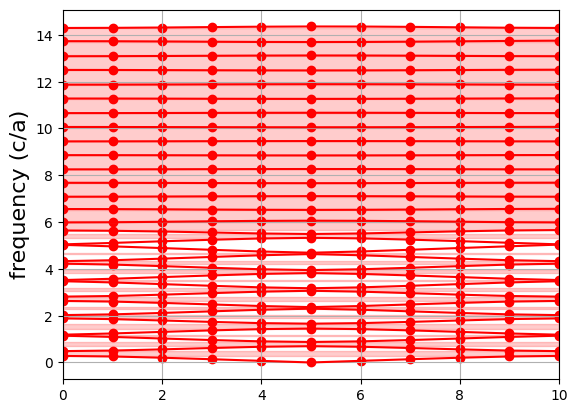

In [9]:
import matplotlib.pyplot as plt
freqs = ms.all_freqs
gaps = ms.gap_list
fig, ax = plt.subplots()
x = range(len(freqs))
for xz, tz in zip(x, freqs):
    ax.scatter([xz]*len(tz), tz, color='red')
ax.plot(freqs, color='red')
#ax.set_ylim([0, 2])
ax.set_xlim([x[0], x[-1]])
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)
#ax.text(12, 0.04, 'bands', color='red', size=15)
points_in_between = (len(freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
#tick_labs = ['Γ', 'X', 'M', 'Γ']
#ax.set_xticks(tick_locs)
#ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)


plt.show()

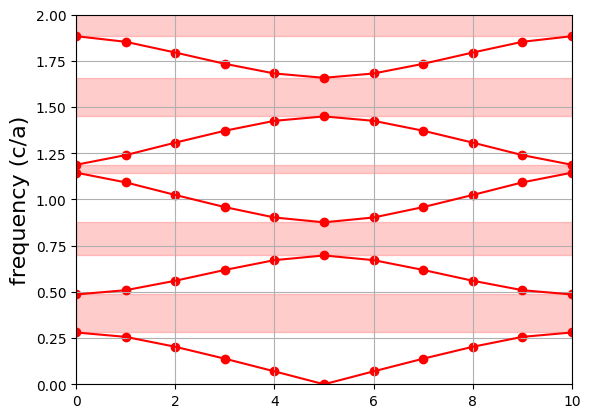

In [10]:
import matplotlib.pyplot as plt
freqs = ms.all_freqs
gaps = ms.gap_list
fig, ax = plt.subplots()
x = range(len(freqs))
for xz, tz in zip(x, freqs):
    ax.scatter([xz]*len(tz), tz, color='red')
ax.plot(freqs, color='red')
ax.set_ylim([0, 2])
ax.set_xlim([x[0], x[-1]])
for gap in gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)
#ax.text(12, 0.04, 'bands', color='red', size=15)
points_in_between = (len(freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
#tick_labs = ['Γ', 'X', 'M', 'Γ']
#ax.set_xticks(tick_locs)
#ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)


plt.show()